## 1. Test and filter outliers

In [1]:
import pandas as pd
pd.set_option('chained_assignment',None)
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def find_type_outliers(df): #find outlier according to the msprice range of individual Crop Type
    types=list(df["Type"].unique())
    for typ in types:
        data_temp=df[df["Type"]==typ]
        actual=len(data_temp)
        q1 = data_temp["msprice"].quantile(0.25)
        q3 = data_temp["msprice"].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        lower_threshold  = q1-1.5*iqr
        upper_threshold = q3+1.5*iqr
        data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
        filtered=len(data_filter)
        if actual!=filtered:
            print(typ)
        else:
            print("No outlier found in ",typ)

In [3]:
def plot_commodity_outliers(df): #plot commodity price outliers in a particular type 
    commodities=list(df["commodity"].unique())
    flag=0
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data_filter=data_temp[(data_temp["msprice"] > lower_threshold) & (data_temp["msprice"] < upper_threshold)]
            filtered=len(data_filter)
            if actual!=filtered:
                flag=1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="commodity", y="msprice",data=data_filter) #box plot
                sns.stripplot(x="commodity", y="msprice",data=data_temp,jitter=True,marker='o',alpha=0.5,color='red') #overlay dat points (show outliers which are not compensated)
                patch_1 = mpatches.Patch(color='#31749F', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    if flag==0:
        print("No commodity price outlier in ",df["Type"].iloc[0] )

In [4]:
def remove_outlier_cmo(df): #find outlier according to the msprice of commodity and remove them
    data_main=pd.DataFrame()
    commodities=list(df["commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["msprice"].quantile(0.25)
            q3 = data_temp["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["msprice"].tolist()]
            filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
            data_temp["msprice"]=filtered_values
            data_temp.sort_values("year",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

### Dataset:  CMO_MSP_Mandi.csv

In [5]:
df=pd.read_csv("CMO_MSP_Mandi.csv")
df=df.dropna(subset=["msprice"])

In [6]:
df.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


### Overall Boxplot Visualization 

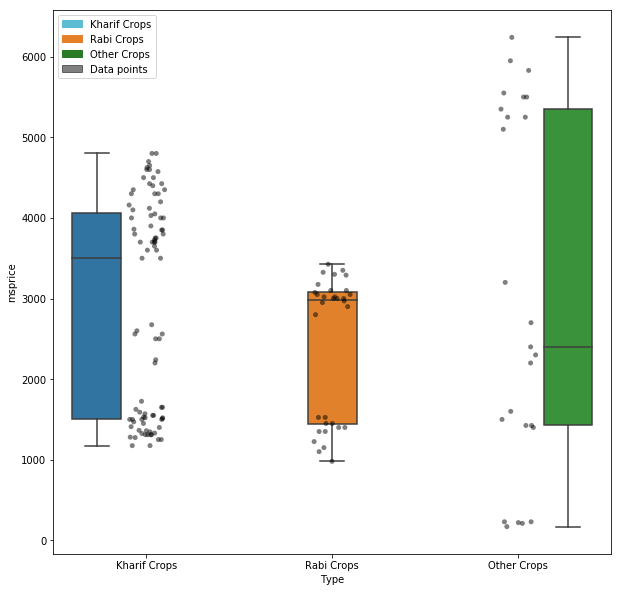

In [7]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type", y="msprice",hue='Type',data=df) #box plot
sns.stripplot(y='msprice', x='Type',data=df,jitter=True,marker='o',alpha=0.5,color='black') #overlay data point
patch_1 = mpatches.Patch(color='#5DBCD2', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='#297925', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

### Finding outlier for  particular type of crops

In [8]:
find_type_outliers(df)

No outlier found in  Kharif Crops
No outlier found in  Rabi Crops
No outlier found in  Other Crops


### Finding outlier for individual commodities in a particular type of crop

#### Kharif Crops

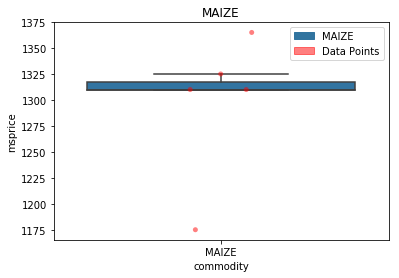

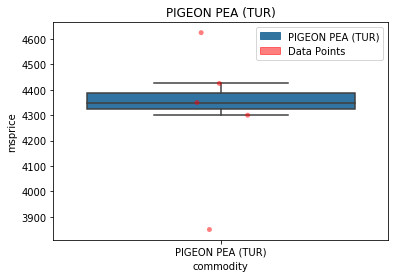

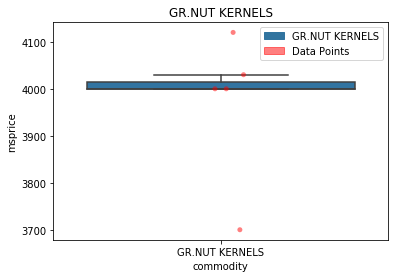

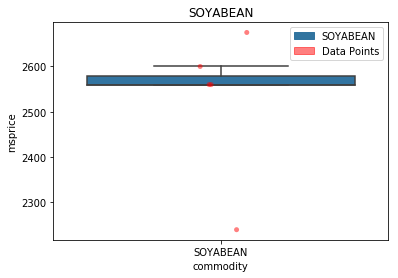

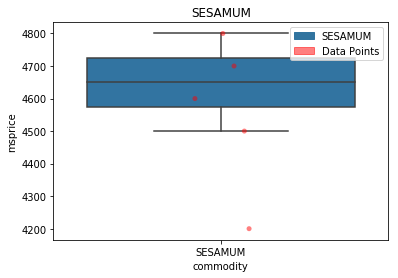

In [9]:
plot_commodity_outliers(df[df["Type"]=="Kharif Crops"])

#### Rabi Crops

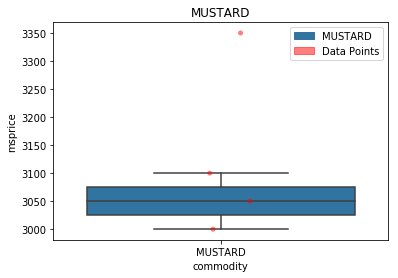

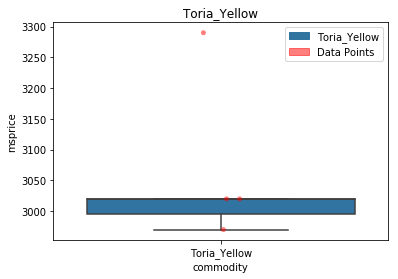

In [10]:
plot_commodity_outliers(df[df["Type"]=="Rabi Crops"])

#### Other Crops

In [11]:
plot_commodity_outliers(df[df["Type"]=="Other Crops"])

No commodity price outlier in  Other Crops


#### Remove outliers and save as csv

In [12]:
data=remove_outlier_cmo(df)
data.to_csv("CMO_MSP_Mandi_filtered.csv",index=False)

### Dataset:  Monthly_data_cmo.csv

In [13]:
def remove_outlier(df): #find outlier according to the modal price of commodity and remove them
    data_main=pd.DataFrame()
    commodities=list(df["Commodity"].unique())
    for commodity in commodities:
        data_temp=df[df["Commodity"]==commodity]
        actual=len(data_temp)
        if actual>1:
            q1 = data_temp["modal_price"].quantile(0.25)
            q3 = data_temp["modal_price"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            filtered_values=[upper_threshold if x> upper_threshold else x for x in data_temp["modal_price"].tolist()]
            filtered_values=[lower_threshold if x< lower_threshold else x for x in filtered_values]
            data_temp["modal_price"]=filtered_values
            data_temp.sort_values("date",inplace=True)
            
        data_main=pd.concat([data_main,data_temp])
        data_main.reset_index(drop=True,inplace=True)
    return data_main

In [14]:
df=pd.read_csv("Monthly_data_cmo.csv")
df["Commodity"]=df["Commodity"].apply( lambda x : x.lower())
df=df[df["modal_price"]!=0]
df["date"]=pd.to_datetime(df["date"])

In [15]:
df.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04-01,Ahmadnagar,Maharashtra
1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04-01,Ahmadnagar,Maharashtra
2,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,2015-04-01,Ahmadnagar,Maharashtra
3,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,2016-04-01,Ahmadnagar,Maharashtra
4,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,2015-04-01,Ahmadnagar,Maharashtra


#### There are 349 distinct APMC (Aggriculture Produce Market Committees, visualization of the outlier in each committee can be viewded on the below link (note: the visualization is done only for those commodities with outliers in modal_price within each APMC)  respectively

https://socialcopstaskone.herokuapp.com/app

#### Remove outliers and save as csv

In [16]:
df_filtered=pd.DataFrame()
for apmc in df["APMC"].unique().tolist():
    df_temp=df[df["APMC"]==apmc]
    data=remove_outlier(df_temp)
    df_filtered=pd.concat([df_filtered,data])
    
df_filtered.reset_index(drop=True,inplace=True)
df_filtered.to_csv("Monthly_data_cmo_filtered.csv",index=False)